# Problem Set 2: Local & Adversarial Search

**Release Date:** 1 September 2025

**Due Date:** 13 September 2025

## Overview

In class, we discussed a range of search algorithms. In this problem set, we will get some hands-on practice by implementing local search for the **Travelling Salesman Problem (TSP)**, which operates in a fully-observable, single-agent, deterministic, episodic, static, and discrete environment. We will also get some hands-on practice on Adversarial Search by coding an AI to play the game **Breakthrough**.

**Required Files**:
* ps2.py

**Plagiarism Policy**: Please refer to our [Course Policies](https://canvas.nus.edu.sg/courses/77861/pages/course-policies)

**IMPORTANT**: While it is possible to write and run Python code directly in Jupyter notebook, we recommend that you do this Problem set with an IDE using the .py file provided. An IDE will make debugging significantly easier.

**Post-Problem Set Survey**:
Your feedback is important to us! After completing Problem Set 2, please take a moment to share your thoughts by filling out this [survey](https://coursemology.org/courses/3095/surveys/2714).

## The Travelling Salesman Problem (TSP)

Your cousin Ben Bitdiddle is planning to start a company which sells premium imported chocolate from Europe. Among all cities in the country, Ben must choose one to be his company headquarters to receive shipment from Europe and devise a route from the headquarters to deliver the chocolate to every other city. This route must only visit each city **exactly once** and return to the headquarters to receive the next shipment. In addition, to save fuel cost, the route must be **as short as possible**. Given a list of cities and the distance between every two cities, what is the shortest possible route?

This problem is a classic NP-hard optimisation problem in computer science. In this task, you will design and implement a local search algorithm to find a shortest route. You must find the route as **a list of cities** in the order of travel from the starting city to the last city before returning.

For example, consider the graph below, which represents 4 cities and the distances between them.

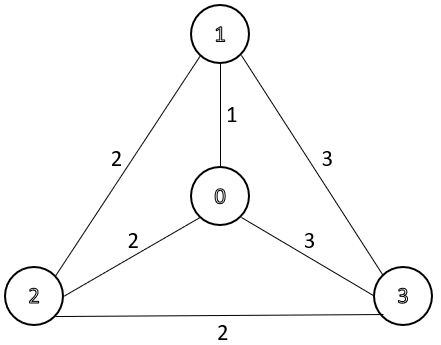

An optimal route is `[0, 1, 2, 3]`, with the minimal distance travelled of 1 + 2 + 2 + 3 = 8.

**Note:**
* There can be more than 1 shortest route, e.g., `[1, 0, 3, 2]`, `[1, 3, 2, 0]`, etc. You only need to find one such route.
* `[0, 1, 2]` is not legal as the route must go through all 4 cities.
* `[0, 1, 2, 3, 1]` is not legal as city 1 is visited more than once.
* `[1, 3, 0, 2]` is legal but it is not the shortest route, as the distance travelled of 3 + 3 + 2 + 2 = 10.

### Task 1.1: State representation
Propose a state representation for this problem if we want to formulate it as a local search problem.

State representation is of the list of cities visited, in order of visitation.

e.g. [1, 0, 3, 2] as mentioned in the context.

### Task 1.2: Initial and goal states

What are the initial and goal states for the problem under your proposed representation?

**Note:**
* In many optimization problems such as the TSP, the path to the goal is irrelevant; **the goal state itself is the solution to the problem**.
* Local search algorithms keep a single "current" state and move from a state to another in the search space by applying local changes (with the help of a *successor function*), until an optimal solution is found.

Initial state - random permutation of a route

Goal state - route with shortest path to each city before returning to the start (must have n elements, where n is number of cities)

### Can you do better?

Recall that similar to A* search, local search utilises evaluation functions to decide how to transition from one state to another. However, being an uninformed guy, your cousin Ben Bitdiddle tells you to use the "greedy" solution. Given an incomplete route, the "greedy" solution builds a path by adding the closest unvisited node from the last visited node, until all nodes are visited. For instance, in the graph above, the "greedy" solution is `[0, 1, 2, 3]`.

Although this solution seems relatively sensible, as a CS2109S student, you have a nagging feeling that it may not work all the time. Can you create an evaluation function and successor function to get better results with local search?


**Note:**

* For the following tasks, we will be benchmarking your hill-climbing algorithm against our own version using the greedy solution. Note that the hidden test cases can be quite large, so any brute-force solution will not suffice. 

* Your own evaluation functions and successor functions may underperform against the greedy solution for small instances of TSP, but should outperform the greedy solution consistently for large instances. For our public and private test cases, we have designed the greedy solution to be suboptimal.

* If your code does not pass the private test cases on Coursemology because it underperforms against the greedy solution, you may re-run your code a few times in case you are "unlucky" with random initial routes.

### Task 1.3: State transitions

Implement a reasonable successor function `successor(route)` to generate new routes by applying minor "tweaks" (swap the order of visits) to the current route. It should return a list of new routes to be used in the next iteration in the hill-climbing algorithm.

**Note:**
* At each iteration, the routes generated from the successor function are evaluated against each other (using an evaluation function). The best route will be selected for the next iteration if it is better than the current route.
* Your successor function should not return too many routes as it would take too much time for evaluation. (do not enumerate all possible states otherwise it will timeout, only generate "neighbors")
* However, if too few routes are generated, you are more likely to be stuck at a local maxima as each route will be compared against fewer routes.
* Although the successor function is non-deterministic, you should keep the randomness low. Hence, random shuffling of all cities is not allowed. Your successor function must exploit the quality of the current route.
* Private test cases will test the quality of `successor`. If you fail the private test cases and are certain your solution is fine, rerun a few times.

Please run the following cell before proceeding. You may use any of the imported libraries/classes here.

In [ ]:
"""
Run this cell before you start!
"""

import random
import time

from typing import List, Tuple, Callable

In [ ]:
def successor(route: List[int]) -> List[List[int]]:
    """
    Generates new routes to be used in the next iteration in the hill-climbing algorithm.

    Args:
        route (List[int]): The current route as a list of cities in the order of travel.

    Returns:
        new_routes (List[List[int]]): New routes to be considered.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

# Test cases
def test_successor(route):
    sorted_route = sorted(route)
    result = successor(route)
    assert result is not None, "Successor function returns an empty list."
    assert any(result), "Successor function returns an empty list."
    for new_route in result:
        assert len(new_route) == len(sorted_route), "New route does not have the same number of cities as the original route."
        assert sorted(new_route) == sorted_route, "New route does not contain all cities present in the original route."

permutation_route = list(range(4))
new_permutation_routes = successor(permutation_route)
assert len(new_permutation_routes) < 24, "Your successor function may have generated too many new routes by enumerating all possible states."

test_successor([1, 3, 2, 0])
test_successor([7, 8, 6, 3, 5, 4, 9, 2, 0, 1])

### Task 1.4: Evaluation function
Implement an evaluation function `evaluation_func(cities, distances, route)` that would be helpful in deciding on the "goodness" of a route, i.e. an optimal route should return a higher evaluation score than a suboptimal one.

Please note that the route must only visit each city **exactly once** and **return to the headquarters**

In [ ]:
def evaluation_func(
    cities: int,
    distances: List[Tuple[int]],
    route: List[int]
) -> float:
    """
    Computes the evaluation score of a route

    Args:
        cities (int): The number of cities to be visited.

        distances (List[Tuple[int]]): The list of distances between every two cities. Each distance
            is represented as a tuple in the form of (c1, c2, d), where c1 and c2 are the two cities
            and d is the distance between them. The length of the list should be equal to cities *
            (cities - 1)/2.

        route (List[int]): The current route as a list of cities in the order of travel.

    Returns:
        h_n (float): the evaluation score.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

# Test cases
cities = 4
distances = [(1, 0, 10), (0, 3, 22), (2, 1, 8), (2, 3, 30), (1, 3, 25), (0, 2, 15)]


route_1 = evaluation_func(cities, distances, [0, 1, 2, 3])
route_2 = evaluation_func(cities, distances, [2, 1, 3, 0])
route_3 = evaluation_func(cities, distances, [1, 3, 2, 0])
route_4 = evaluation_func(cities, distances, [2, 3, 0, 1])

assert route_1 == route_2
assert route_1 > route_3
assert route_1 == route_4, "Have you considered the cost to travel from the last city to the headquarter (first)?"

### Task 1.5: Explain your evaluation function

Explain why your evaluation function is suitable for this problem (how a higher evaluation score indicates that a route is more optimal than the other).

### Hill-climbing
Using the representation above, we can implement the hill-climbing algorithm `hill_climbing(cities, distances, successor, evaluation_func)`, which takes in the number of cities and the list of distances, a successor function, an evaluation function and returns the shortest route as a list of cities.

1. The hill-climbing approach is a local search algorithm which starts with a randomly-initialised state and continuously selects the next candidate solution that locally maximizes the reduction of the evaluation function.

2. The algorithm terminates when a (local) maxima is reached, i.e. a solution that cannot be improved further by looking at the next candidate solutions.

3. Unlike previous search algorithms you have implemented, hill-climbing only keeps a single current state. As such, it does not involve a search tree/graph. Backtracking is also not possible.

In [ ]:
def hill_climbing(
    cities: int,
    distances: List[Tuple[int]],
    successor: Callable,
    evaluation_func: Callable
) -> List[int]:
    """
    Hill climbing finds the solution to reach the goal from the initial.

    Args:
        cities (int): The number of cities to be visited.

        distances (List[Tuple[int]]): The list of distances between every two cities. Each distance
            is represented as a tuple in the form of (c1, c2, d), where c1 and c2 are the two cities
            and d is the distance between them. The length of the list should be equal to cities *
            (cities - 1)/2.

        Successor (Callable): A function that generates new routes to be used in the next
            iteration in the hill-climbing algorithm. Will be provided on Coursemology.

        evaluation_func (Callable): A function that computes the evaluation score of a route. Will
            be provided on Coursemology.

    Returns:
        route (List[int]): The shortest route, represented by a list of cities in the order to be
            traversed.
    """
    route = random.sample(list(range(cities)), cities)
    curr_hn = evaluation_func(cities, distances, route)
    while True:
        new_routes = successor(route)
        best_new_route = max(new_routes, key=lambda x: evaluation_func(cities, distances, x))
        h_n = evaluation_func(cities, distances, best_new_route)
        if h_n <= curr_hn:
            return route

        curr_hn = h_n
        route = best_new_route

### Task 1.6: Improved hill-climbing

When no "better" neighbouring solutions are present, local search can be stuck at a local maxima. Think of a way you can combat this limitation, and implement `hill_climbing_improved(cities, distances, successor, evaluation_func, hill_climbing)` below.

* Coursemology will test this question with correct implementation of `successor(route)`, `evaluation_func(cities, distances, route)` and `hill_climbing(cities, distances, successor, evaluation_func)`
* Note that the implemented `evaluation_func(cities, distances, route)` returns a float, which can be from `float(-inf)` to `float(inf)`.
* Note that the `hill_climbing(cities, distances, successor, evaluation_func)` is implemented with random starting states, so there is no need to provide a random starting state manually.

In [ ]:
def hill_climbing_improved(
    cities: int,
    distances: List[Tuple[int]],
    successor: Callable,
    evaluation_func: Callable,
    hill_climbing: Callable
) -> List[int]:
    """
    Improved hill climbing that finds the solution to reach the goal from the initial.

    Args:
        cities (int): The number of cities to be visited.

        distances (List[Tuple[int]]): The list of distances between every two cities. Each distance
            is represented as a tuple in the form of (c1, c2, d), where c1 and c2 are the two cities
            and d is the distance between them. The length of the list should be equal to cities *
            (cities - 1)/2.

        successor (Callable): The successor function to be used in hill climbing. Will be
            provided on Coursemology.

        evaluation_func (Callable): The evaluation function to be used in hill climbing. Will be
            provided on Coursemology.

        hill_climbing (Callable): The hill climbing function to be used for each restart. Will be
            provided on Coursemology.

    Returns:
        route (List[int]): The shortest route, represented by a list of cities in the order to be
            traversed.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

# Test cases
def test_improved_hill_climbing(cities: int, distances: List[Tuple[int]], successor, evaluation_func, hill_climbing, hill_climbing_improved):
    route = hill_climbing_improved(cities, distances, successor, evaluation_func, hill_climbing)
    assert sorted(route) == list(range(cities)), "New route does not contain all cities present in the original route."

cities_1 = 4
distances_1 = [(1, 0, 10), (0, 3, 22), (2, 1, 8), (2, 3, 30), (1, 3, 25), (0, 2, 15)]

test_improved_hill_climbing(cities_1, distances_1, successor, evaluation_func, hill_climbing, hill_climbing_improved)

cities_2 = 10
distances_2 = [(2, 7, 60), (1, 6, 20), (5, 4, 70), (9, 8, 90), (3, 7, 54), (2, 5, 61),
    (4, 1, 106), (0, 6, 51), (3, 1, 45), (0, 5, 86), (9, 2, 73), (8, 4, 14), (0, 1, 51),
    (9, 7, 22), (3, 2, 22), (8, 1, 120), (5, 7, 92), (5, 6, 60), (6, 2, 10), (8, 3, 78),
    (9, 6, 82), (0, 2, 41), (2, 8, 99), (7, 8, 71), (0, 9, 32), (4, 0, 73), (0, 3, 42),
    (9, 1, 80), (4, 2, 85), (5, 9, 113), (3, 6, 28), (5, 8, 81), (3, 9, 72), (9, 4, 81),
    (5, 3, 45), (7, 4, 60), (6, 8, 106), (0, 8, 85), (4, 6, 92), (7, 6, 70), (7, 0, 22),
    (7, 1, 73), (4, 3, 64), (5, 1, 80), (2, 1, 22)]

test_improved_hill_climbing(cities_2, distances_2, successor, evaluation_func, hill_climbing, hill_climbing_improved)

### Task 1.7: Comparison between local search and other search algorithms

Compared to previous search algorithms you have seen (uninformed search, A* search), why do you think local search is more suitable for this problem?

Recommended points to discuss:
* Size of search space
* Is there any goal state / goal test to terminate our search algorithm?
* What kind of output are we looking for?

Local Search is more suitable because this is an optimisation problem, so the goal can be any state.

**Size of search space**

Since the size of search space is extremely large, it is not practical to use A*/uninformed search as search through all possible solutions.

Local search focuses on improving a singular solution, hence, making it a better choice for this problem.

**Is there any goal state/goal state to terminate our search algorithm?**

The goal is not a specific state so A*/uninformed search will not know when to terminate due to the lack of a heuristic function. 

**What kind of output are we looking for?**

We are looking for the most optimal solution, which local search is designed to handle.

## Breakthrough

Breakthrough was the winner of the 2001 8 × 8 Game Design Competition, sponsored by *About.com* and *Abstract Games Magazine*. When Dan Troyka formulated it, it was originally for a 7×7 board. We’re going to play it on a 6×6 board to limit the complexity. In terms of our terminology for the agent environment, Breakthrough is a fully observable, strategic, deterministic game. The game always results in a win for one of the two players.

How exactly do you design an agent to play this game and, most importantly, win? An agent takes sensory input and reasons about it, and then outputs an action at each time step. You thus need to create a program that can read in a representation of the board (that’s the input) and output a legal move in Breakthrough. You then need an evaluation function to evaluate how good a position is.

In this problem set, you will first implement a minimax agent, followed by augmenting it with alpha-beta pruning. You will then implement an improved evaluation function.

## Breakthrough Technical Description

<pre>
<p style="text-align: center;">
<img src="images/breakthrough_board.png">
Figure 1. Game Board
</p>
</pre>

*Figure 1* shows the starting position of our game board. The player controlling the black pieces can move the black pawns (**B**), and the other player controlling the white pieces can move the white pawns (**W**). Each player can only move pieces of their own colour during their turn. Black can move its pawns forward towards the bottom of the board, while white can move its pawns forward towards the top of the board. Black wins by moving any piece to the opposite side, row (horizontal) index 5. White wins by moving any piece to row (horizontal) index 0. A side also wins if their opponent has no pieces left. **Kindly follow the same indexing as provided in *Figure 1***.

<pre>
<p style="text-align: center;">
<img src="images/game_move_black.png">
Figure 2. Possible Moves for Black
</p>
</pre>

Pieces move one space directly forward or diagonally forward, and only capture diagonally forward. An example of possible moves for black is illustrated in *Figure 2*. In this figure, the black pawn at (3, 2) can move forward to any of the three spaces in row index 4. The black pawn at (0, 4) can either move diagonally right to (1, 5), or capture by moving diagonally left to (1, 3). It cannot capture by moving forward; its forward movement is blocked by the white pawn at (1, 4). Note that your move is not allowed to take your pawn outside the board.

<pre>
<p style="text-align: center;">
<img src="images/game_move_white.png">
Figure 3. Possible Moves for White
</p>
</pre>

The same movement rules apply to white as illustrated in *Figure 3*. In this figure, the white pawn at (1, 3) can move forward to any of the three spaces in row index 0. The white pawn at (4, 2) can either move diagonally right to (3, 3), or capture by moving diagonally left to (3, 1). It cannot capture by moving forward; its forward movement is blocked by the black pawn at (3, 2).

## Provided Utility Functions

You can use the function provided as you see fit. The function `Player.get_opponent()` will return the opponent's colour given a player colour. You will implement other functions later on to supplement the given minimax algorithm.

- `Player.get_opponent()`: Given a player colour, it returns the opponent's colour.
- `print_state(board)`: It takes in the board 2D list as parameter and prints out the current state of the board in a comprehensible way.

Please run the following cell before proceeding. You may use any of the imported libraries/classes here. 

In [ ]:
"""
Run this cell before you start!
"""

import copy
from enum import Enum
from typing import Callable, Union

class Player(Enum):
    BLACK = 'black'
    WHITE = 'white'

    # returns the opponent of the current player
    def get_opponent(self):
        if self == Player.BLACK:
            return Player.WHITE
        else:
            return Player.BLACK
        
# board row and column -> these are constant
ROW, COL = 6, 6
INF = 90129012
WIN = 21092109
MOVE_NONE = (-1, -1), (-1, -1)
TIME_LIMIT = 10

Score = Union[int, float]
Move = tuple[tuple[int, int], tuple[int, int]]
Board = list[list[str]]
State = tuple[Board, Player]
Action = tuple[tuple[int, int], tuple[int, int]]


# prints out the current state of the board in a comprehensible way
def print_state(board: Board) -> None:
    horizontal_rule = "+" + ("-" * 5 + "+") * COL
    for row in board:
        print(horizontal_rule)
        print(f"|  {'  |  '.join(' ' if tile == '_' else tile for tile in row)}  |")
    print(horizontal_rule)

To build your own agent, you will need a heuristic function to evaluate a position. The heuristic function below evaluates the board from black's perspective. You will be using this heuristic function for tasks 2.1 and 2.2.

In [ ]:
def heuristic(state: State) -> Score:
    """
    Returns the score of the current position.

    Parameters
    ----------
    board: 2D list of lists. Contains characters "B", "W", and "_",
    representing black pawn, white pawn, and empty cell, respectively.

    Returns
    -------
    An evaluation (as a Score).
    """
    bcount = 0
    wcount = 0
    board = state[0]
    for r, row in enumerate(board):
        for tile in row:
            if tile == "B":
                if r == 5:
                    return WIN
                bcount += 1
            elif tile == "W":
                if r == 0:
                    return -WIN
                wcount += 1
    if wcount == 0:
        return WIN
    if bcount == 0:
        return -WIN
    return bcount - wcount

The provided heuristic function returns `WIN` if black wins, and `-WIN` if white wins. Otherwise, it takes the difference between the number of black pieces and the number of white pieces that are on the board. The value of `WIN` can be found and has a value of `21092109`.

**Note**: On Coursemology, we will provide and use this heuristic function to test your code in task 2.1 and task 2.2.

## Minimax Algorithm

Your agent must be able to calculate the game state a few moves in advance, by implementing the **minimax** algorithm.

### Task 2.1: Implementing Breakthrough for Minimax

In the lecture, you have seen the minimax algorithm without and with cutoff. Here we have given to you minimax with cutoff, as the depth of the game and the branching factor in certain positions can be (very) large and we do not have the computational power to compute the entire game until the terminal states.

The minimax function explores different game states, until either the depth is `max_depth`, or there is a winner. In these cases, the minimax algorithm uses the provided heuristic function, `utility(board)` to evaluate the position.

The minimax function is able to handle making the first move for either black or white. Regardless of which player moves first, the minimax evaluation and returned score is always done from the perspective of black.

You are to implement the following functions given below:
- `valid_actions(state)` to generate all possible moves for a player given the current board state. The function should work for the current player to move, whether it is black or white.
- `transition(state, action)`: Given the state and action (source and dest), this function updates the board configuration based on the indicated action. 
- `is_terminal(state)`: Given the state, it returns `True` if the game is over, `False` otherwise.
- `utility(state)`: Returns the score of a terminal state


**Note**: 
* For tasks 2.1 and 2.2, if you are certain that your solution is correct but the test cases fail on Coursemology due to timeout, just rerun your code. Depending on the load on Coursemology, a correct solution might still timeout.
* The algorithm returns scores from the black perspective.

In [ ]:
def valid_actions(
    state: State
) -> set[Action]:
    """
    Generates a list containing all possible actions in a particular position for the current player
    to move. Return an empty set if there are no possible actions.

    Parameters
    ----------
    state: A tuple conntaining board and current_player information. Board is a 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively. current_player is the colour of the current player to move.

    Returns
    -------
    A set of Actions.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

def transition(
        state: State,
        action: Action,
    ) -> State:
    """
    Updates the board configuration by modifying existing values if in_place is set to True,
    or creating a new board with updated values if in_place is set to False.

    Parameters
    ----------
    state: A tuple conntaining board and current_player information. Board is a 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively. current_player is the colour of the current player to move.
    action: A tuple containing source and destination position of the pawn.

    Returns
    -------
    The new State.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

# checks if it is a terminal state
def is_terminal(state: State) -> bool:
    """
    Returns True if game is over.

    Parameters
    ----------
    state: A tuple conntaining board and current_player information. Board is a 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively. current_player is the colour of the current player to move.

    Returns
    -------
    A bool representing whether the game is over.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

def utility(state: State) -> int:
    """
    Returns score of the terminal state from the point of view of black.

    Parameters
    ----------
    state: A tuple conntaining board and current_player information. Board is a 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively. current_player is the colour of the current player to move.

    Returns
    -------
    int representing the score.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """


def evaluate (state: State) -> int:
    """
    Returns the value of heuristic(state) if it has hit max_depth, otherwise calls utility(state) if it is a terminal state

    Parameters
    ----------
    state: A tuple conntaining board and current_player information. Board is a 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively. current_player is the colour of the current player to move.

    Returns
    -------
    int representing the score.
    """
    #It has hit max_depth
    if not is_terminal(state):
        return heuristic(state)
    
    return utility(state)


def minimax(
    board: Board,
    depth: int,
    max_depth: int,
    current_player: Player,
) -> tuple[Score, Action]:
    """
    Finds the best move for the current player and corresponding evaluation from black's
    perspective for the input board state. Return MOVE_NONE if no move is possible
    (e.g. when the game is over).

    Parameters
    ----------
    board: 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively. Your function may modify
        the board internally, but the original board passed as an argument must remain unchanged.

    depth: int, the depth to search for the best move. When this is equal to `max_depth`, you
        should get the evaluation of the position using the provided heuristic function.

    max_depth: int, the maximum depth for cutoff.

    current_player: Player, the colour of the current player to move.

    Returns
    -------
    A tuple (evaluation, ((src_row, src_col), (dst_row, dst_col))):
    evaluation: the best score that the current player to move can achieve.
    src_row, src_col: position of the pawn to move.
    dst_row, dst_col: position to move the pawn to.
    """

    state = (board,current_player)
    
    if depth == max_depth or is_terminal(state):
        return evaluate(state), MOVE_NONE

    if current_player == Player.BLACK:
        best_score = -INF
    else:
        best_score = INF

    best_move = MOVE_NONE
    next_player = current_player.get_opponent()

    for action in valid_actions(state):
        child = transition(state, action)
        new_board = child[0]
        score = minimax(new_board, depth + 1, max_depth, next_player)[0]

        if current_player == Player.BLACK:
            if score > best_score:
                best_score = score
                best_move = action
        else:
            if score < best_score:
                best_score = score
                best_move = action

    return best_score, best_move

In [ ]:
# Test cases
# Test cases for valid_actions
def test_valid_actions():
    # Test case 1: A single black pawn in the middle with all three forward moves possible
    board_1 = [
        list("______"),
        list("__B___"),
        list("______"),
        list("______"),
        list("______"),
        list("______"),
    ]
    state_1 = (board_1, Player.BLACK)
    actions_1 = valid_actions(state_1)
    expected_actions_1 = {
        ((1, 2), (2, 1)), 
        ((1, 2), (2, 2)), 
        ((1, 2), (2, 3))
    }
    assert actions_1 == expected_actions_1, "valid_actions failed for a single black pawn with 3 empty forward squares."

    # Test case 2: A single white pawn at the edge with two forward moves possible
    board_2 = [
        list("______"),
        list("______"),
        list("______"),
        list("______"),
        list("W_____"),
        list("______"),
    ]
    state_2 = (board_2, Player.WHITE)
    actions_2 = valid_actions(state_2)
    expected_actions_2 = {
        ((4, 0), (3, 0)), 
        ((4, 0), (3, 1))
    }
    assert actions_2 == expected_actions_2, "valid_actions failed for a single white pawn at the edge."

    # Test case 3: Mixed moves for a black pawn
    board_3 = [
        list("______"),
        list("___B__"),
        list("__W_W_"),
        list("______"),
        list("______"),
        list("______"),
    ]
    state_3 = (board_3, Player.BLACK)
    actions_3 = valid_actions(state_3)
    expected_actions_3 = {
        ((1, 3), (2, 2)),
        ((1, 3), (2, 3)),
        ((1, 3), (2, 4))
    }
    assert actions_3 == expected_actions_3, "valid_actions failed for Black's mixed moves (move and capture)."

    # Test case 4: A fully blocked black pawn has no moves.
    board_4 = [
        list("______"),
        list("__B___"),
        list("_BWB__"),
        list("______"),
        list("______"),
        list("______"),
    ]
    state_4 = (board_4, Player.BLACK)
    actions_4 = valid_actions(state_4)
    pawn_at_1_2_moves = {action for action in actions_4 if action[0] == (1, 2)}
    assert len(pawn_at_1_2_moves) == 0, "valid_actions failed for a fully blocked pawn; it should have no moves."

    print("All valid_actions tests passed!")

# Test cases for transition
def test_transition():
    # Test case 1: Black pawn moves forward
    board_1 = [
        list("______"),
        list("__B___"),
        list("______"),
        list("______"),
        list("______"),
        list("______"),
    ]
    state_1 = (board_1, Player.BLACK)
    action_1 = ((1, 2), (2, 2))
    new_state_1 = transition(state_1, action_1)
    expected_board_1 = [
        list("______"),
        list("______"),
        list("__B___"),
        list("______"),
        list("______"),
        list("______"),
    ]
    assert new_state_1[0] == expected_board_1, "transition failed for Black's forward move."

    # Test case 2: White pawn captures a black pawn
    board_2 = [
        list("______"),
        list("__B___"),
        list("_W____"),
        list("______"),
        list("______"),
        list("______"),
    ]
    state_2 = (board_2, Player.WHITE)
    action_2 = ((2, 1), (1, 2))
    new_state_2 = transition(state_2, action_2)
    expected_board_2 = [
        list("______"),
        list("__W___"),
        list("______"),
        list("______"),
        list("______"),
        list("______"),
    ]
    assert new_state_2[0] == expected_board_2, "transition failed for White's capture move."
    
    # Test case 3: Original board is not modified
    original_board = [
        list("______"),
        list("__B___"),
        list("______"),
        list("______"),
        list("______"),
        list("______"),
    ]
    original_board_copy = copy.deepcopy(original_board)
    state_3 = (original_board, Player.BLACK)
    action_3 = ((1, 2), (2, 2))
    transition(state_3, action_3)
    assert original_board == original_board_copy, "transition function should not modify the original board."

    print("All transition tests passed!")

# Test cases for is_terminal
def test_is_terminal():
    # Test case 1: Black wins by reaching the end
    board_1 = [
        list("______"), list("______"), list("______"),
        list("______"), list("______"), list("___B__"),
    ]
    assert is_terminal((board_1, Player.BLACK)) is True, "is_terminal failed for Black's win condition."

    # Test case 2: White wins by eliminating all black pieces
    board_2 = [
        list("______"), list("__W___"), list("______"),
        list("______"), list("______"), list("___W__"),
    ]
    assert is_terminal((board_2, Player.WHITE)) is True, "is_terminal failed when Black has no pieces."

    # Test case 3: Non-terminal state
    board_3 = [
        list("______"), 
        list("__B___"), 
        list("______"),
        list("_W____"), 
        list("______"), 
        list("______"),
    ]
    assert is_terminal((board_3, Player.BLACK)) is False, "is_terminal failed for a non-terminal state."

    print("All is_terminal tests passed!")

# Test cases for utility
def test_utility():
    # Test case 1: Black wins
    board_1 = [
        list("______"), list("______"), list("______"),
        list("______"), list("______"), list("B_____"),
    ]
    assert utility((board_1, Player.BLACK)) == WIN, "utility failed for Black's win."

    # Test case 2: White wins
    board_2 = [
        list("W_____"), list("______"), list("______"),
        list("______"), list("______"), list("______"),
    ]
    assert utility((board_2, Player.WHITE)) == -WIN, "utility failed for White's win."

    # Test case 3: Black wins (no white pieces)
    board_3 = [
        list("______"), list("B_____"), list("______"),
        list("______"), list("______"), list("______"),
    ]
    assert utility((board_3, Player.BLACK)) == WIN, "utility failed for Black's win by eliminating opponent."

    print("All utility tests passed!")

test_valid_actions()
test_transition()
test_is_terminal()
test_utility()

print("\nAll new test cases for core functions passed successfully!")

## Alpha-beta Pruning

With minimax, our agent can see the future within a few moves. However, the naive implementation of minimax may explore many redundant states, which slows down our agent. As discussed in the lecture, we can apply **alpha-beta pruning** to eliminate unnecessary states, thereby improving our agent's speed and its ability to see even further into the future. This will increase our agent's strength and its likelihood of winning the game. 

First, you should try to integrate alpha-beta pruning with the standard minimax algorithm. Similar to Task 2.1, your minimax function with alpha-beta pruning must be able to handle making the first move for either black or white.

**Copy over your Task 2.1 implementation** and adapt it into alpha beta pruning

### Task 2.2: Integrate alpha-beta pruning into minimax

Note: The Coursemology evaluator is set with a time limit, so you might get a timeout error.

In [ ]:
def minimax_alpha_beta(
    board: Board,
    depth: int,
    max_depth: int,
    alpha: Score,
    beta: Score,
    current_player: Player
) -> tuple[Score, Move]:
    """
    Finds the best move for the current player and corresponding evaluation from black's
    perspective for the input board state. Return MOVE_NONE if no move is possible
    (e.g. when the game is over).

    Parameters
    ----------
    board: 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively. Your function may modify
        the board internally, but the original board passed as an argument must remain unchanged.

    depth: int, the depth to search for the best move. When this is equal to `max_depth`, you
        should get the evaluation of the position using the provided heuristic function.

    max_depth: int, the maximum depth for cutoff.

    alpha: Score. The alpha value in a given state.

    beta: Score. The beta value in a given state.

    current_player: Player, the colour of the current player
        to move.

    Returns
    -------
    A tuple (evaluation, ((src_row, src_col), (dst_row, dst_col))):
    evaluation: the best score that the current player to move can achieve.
    src_row, src_col: position of the pawn to move.
    dst_row, dst_col: position to move the pawn to.
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

In [ ]:
board_41 = [
    list("______"),
    list("__BB__"),
    list("____BB"),
    list("WBW_B_"),
    list("____WW"),
    list("_WW___"),
]

board_42 = [
    list("____B_"),
    list("__BB__"),
    list("______"),
    list("_WWW__"),
    list("____W_"),
    list("______"),
]

board_33 = [
    list("______"),
    list("__B___"),
    list("W_____"),
    list("___B_B"),
    list("__W___"),
    list("______"),
]

board_34 = [
    list("______"),
    list("____BB"),
    list("__B___"),
    list("_W_B_B"),
    list("__W_W_"),
    list("___WW_"),
]

preservation_board = [
    list("___B__"),
    list("______"),
    list("_B__B_"),
    list("W____W"),
    list("___W__"),
    list("_W____"),
]

game_over_board_1 = [
    list("______"),
    list("_W____"),
    list("______"),
    list("______"),
    list("______"),
    list("______"),
]

game_over_board_2 = [
    list("______"),
    list("______"),
    list("______"),
    list("______"),
    list("_B____"),
    list("______"),
]

max_depth_board_1 = [
    list("______"),
    list("W_____"),
    list("______"),
    list("_____B"),
    list("______"),
    list("______"),
]

max_depth_board_2 = [
    list("______"),
    list("______"),
    list("W_____"),
    list("______"),
    list("_____B"),
    list("______"),
]

player_switching_board = [
    list("___B__"),
    list("______"),
    list("_B__B_"),
    list("W____W"),
    list("______"),
    list("___W__"),
]

def invoke_search_fn(search_fn, board, max_depth, current_player):
    if "alpha_beta" in search_fn.__name__:
        return search_fn(board, 0, max_depth, -INF, INF, current_player)
    else:
        return search_fn(board, 0, max_depth, current_player)

def test_board_preservation(search_fn):
    control_board = copy.deepcopy(preservation_board)
    input_board = copy.deepcopy(preservation_board)
    invoke_search_fn(search_fn, input_board, 2, Player.BLACK)
    assert control_board == input_board, "One or more of your functions may be modifying the original board."

def test_game_over(search_fn, board, expected_score):
    score, move = invoke_search_fn(search_fn, board, 1, Player.BLACK)
    assert score == expected_score, f"Your function might not have terminated correctly. when the game is over.\nExpected score: {expected_score}, Actual score: {score}"
    assert move == MOVE_NONE, "Your function might not be returning MOVE_NONE when no moves are possible or it might be generating moves for the opponent instead."

def test_max_depth(search_fn, board, current_player, expected_moves):
    score, move = invoke_search_fn(search_fn, board, 1, current_player)
    assert score == 0, f"Your function may not be terminating at cut off depth or you may be initialising {current_player.value}'s score incorrectly.\nExpected score: 0, Actual score: {score}"
    assert move in expected_moves, f"Your function does not move {current_player.value} pieces during {current_player.value}'s turn, or initialises {current_player.value}'s score incorrectly or terminates early."

def test_player_switching(search_fn, current_player):
    score, _ = invoke_search_fn(search_fn, player_switching_board, 2, current_player)
    assert score != 2, "Your transition function may not be switching player's colours correctly after making a move."
    assert score == 0, "Your function may not be making the most optimal move at each depth."

def test_search(search_fn, board, max_depth, current_player, expected_score, expected_moves):
    score, move = invoke_search_fn(search_fn, board, max_depth, current_player)
    assert score == expected_score, f"Final evaluation score should be {expected_score} instead of {score}."
    assert move in expected_moves, f"Your function does not correctly move {current_player.value}'s pieces despite having the correct evaluation."

In [ ]:
# Test cases
test_board_preservation(minimax_alpha_beta)
test_game_over(minimax_alpha_beta, game_over_board_1, -WIN)
test_game_over(minimax_alpha_beta, game_over_board_2, WIN)
test_max_depth(minimax_alpha_beta, max_depth_board_1, Player.BLACK, [((3, 5), (4, 4)), ((3, 5), (4, 5))])
test_max_depth(minimax_alpha_beta, max_depth_board_2, Player.WHITE, [((2, 0), (1, 0)), ((2, 0), (1, 1))])
test_player_switching(minimax_alpha_beta, Player.BLACK)
test_player_switching(minimax_alpha_beta, Player.WHITE)

test_search(minimax_alpha_beta, board_41, 3, Player.BLACK, WIN, [((3, 4), (4, 5))])
test_search(minimax_alpha_beta, board_42, 6, Player.BLACK, -WIN, [((0, 4), (1, 4)), ((0, 4), (1, 5)), ((1, 2), (2, 2)), ((1, 2), (2, 1)), ((1, 2), (2, 3)), ((1, 3), (2, 3)), ((1, 3), (2, 2)), ((1, 3), (2, 4))])
test_search(minimax_alpha_beta, board_33, 3, Player.WHITE, -WIN, [((2, 0), (1, 0)), ((2, 0), (1, 1))])
test_search(minimax_alpha_beta, board_34, 3, Player.WHITE, -1, [((3, 1), (2, 2)), ((4, 2), (3, 3)), ((4, 4), (3, 3)), ((4, 4), (3, 5))])

## Heuristic Function

Phew, we finish the search algorithm! But, our heuristic function is too simple - it may not give the best evaluation for a position and we need a better one. Therefore, you shall implement the improved heuristic function described below.

### Task 2.3: Implement an improved heuristic function

Recall that the heuristic function should return a larger value when black is closer to winning. If black is closer to winning, black should have more pieces closer to row 5 compared to white having pieces closer to row 0. Of course this is not necessarily the case since you only need one piece to make it through while the rest remain behind, but this is just a heuristic after all. Thus, in this task you are to implement a heuristic that performs better than the previous one, where positions should be taken into account instead of just the number of pieces left. 

Generally, more white pieces closer to the end point should signify a lower heuristic score, while more black pieces closer to the end point will create a higher heuristic score.

In [ ]:
def improved_evaluate(state: State) -> Score:
    """
    Returns the score of the current position with an improved heuristic.

    Parameters
    ----------
    board: 2D list of lists. Contains characters "B", "W", and "_",
        representing black pawn, white pawn, and empty cell, respectively.

    Returns
    -------
    An improved evaluation (as a Score).
    """
    """ YOUR CODE HERE """
    raise NotImplementedError
    """ YOUR CODE END HERE """

# Test cases
board_51 = [
    list("___B__"),
    list("______"),
    list("______"),
    list("__B___"),
    list("_WWW__"),
    list("______"),
]

board_52 = [
    list("___BW_"),
    list("___W__"),
    list("______"),
    list("______"),
    list("______"),
    list("______"),
]

board_53 = [
    list("______"),
    list("______"),
    list("______"),
    list("__B___"),
    list("______"),
    list("______"),
]

board_54 = [
    list("__B___"),
    list("__WB__"),
    list("______"),
    list("______"),
    list("______"),
    list("______"),
]

assert improved_evaluate((board_51, Player.BLACK)) > heuristic((board_51, Player.BLACK)), "Your improved evaluation function should return higher than the original heuristic, as black is winning."
assert improved_evaluate((board_52, Player.BLACK)) == -WIN, "Your improved evaluation function does not correctly evaluate won positions."
assert improved_evaluate((board_53, Player.BLACK)) == WIN, "Your improved evaluation function does not correctly evaluate won positions."
assert improved_evaluate((board_54, Player.BLACK)) < heuristic((board_54, Player.BLACK)), "Your improved evaluation function should return smaller than the original heuristic, as white is winning."

## Test cases

To assist with your implementation, we have provided some examples as test cases. These are not sufficient to ensure that your code works correctly, and we encourage you to write your own additional test cases to test and debug your code.

Note that your answers may be slightly different from the answers provided since multiple valid solutions may exist. During grading, your code will be evaluated on hidden test cases on top of the ones we have provided to check the quality of your search functions and algorithms.